In [64]:
library(igraph)
library(ggplot2)

In [8]:
g1 = sample_gnp(1000, 0.003)
g2 = sample_gnp(1000, 0.004)
g3 = sample_gnp(1000, 0.01)
g4 = sample_gnp(1000, 0.05)
g5 = sample_gnp(1000, 0.1)

In [9]:
dd1 = degree_distribution(g1)
dd2 = degree_distribution(g2)
dd3 = degree_distribution(g3)
dd4 = degree_distribution(g4)
dd5 = degree_distribution(g5)

In [10]:
lab1 = seq(0, length(dd1)-1)
lab2 = seq(0, length(dd2)-1)
lab3 = seq(0, length(dd3)-1)
lab4 = seq(0, length(dd4)-1)
lab5 = seq(0, length(dd5)-1)

In [73]:
mean_ <- function(vals, probs) {
    sum(vals*probs)
}

var_ <- function (vals, probs) {
    m <- mean_(vals,probs)
    (sum(vals*vals*probs)) - (m*m)
}

[1] "For p=0.003 :"

[1] "Observed Mean = 3.086000    Observed Variance = 3.062604"

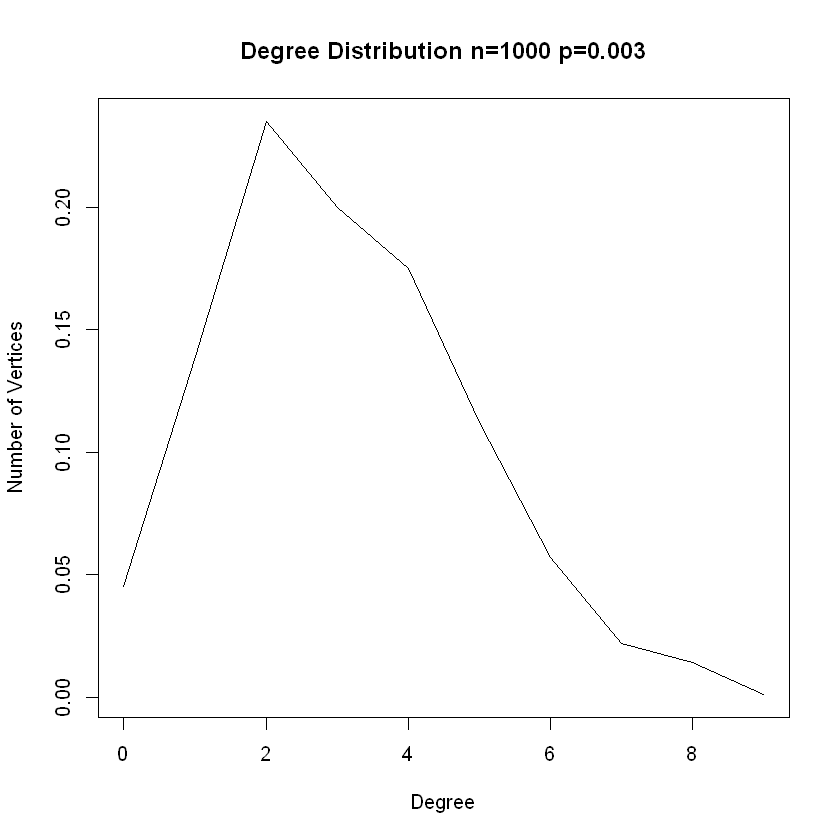

In [78]:
sprintf("For p=0.003 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean_(lab1, dd1), var_(lab1, dd1))
plot(lab1, dd1, type="l", main="Degree Distribution n=1000 p=0.003", xlab="Degree", ylab="Number of Vertices")

[1] "For p=0.004 :"

[1] "Observed Mean = 3.998000    Observed Variance = 4.107996"

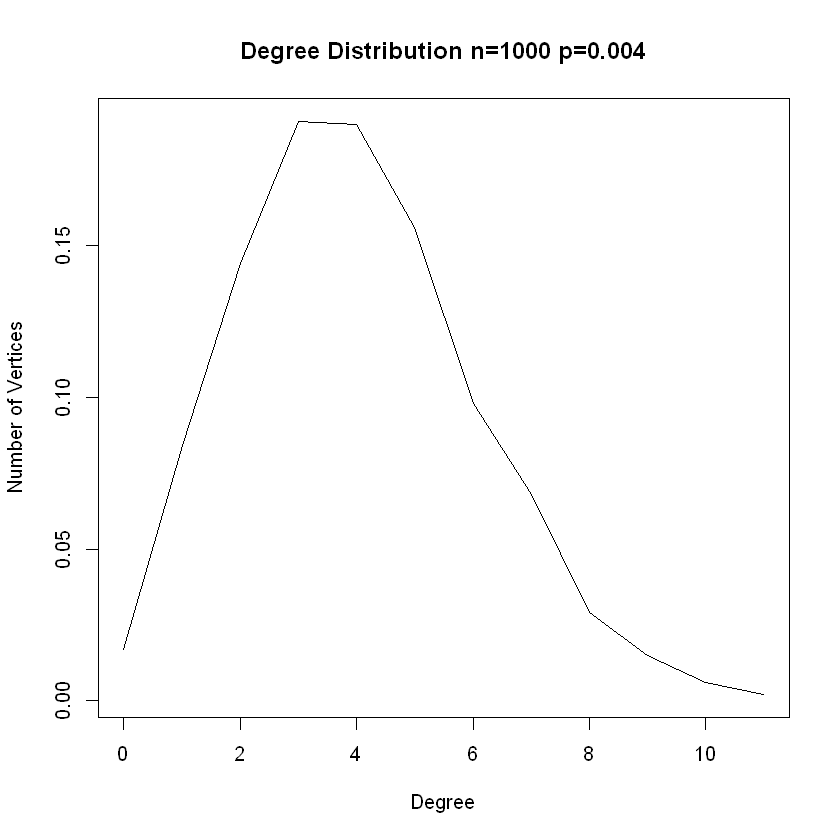

In [79]:
sprintf("For p=0.004 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean_(lab2, dd2), var_(lab2, dd2))
plot(lab2, dd2, type="l", main="Degree Distribution n=1000 p=0.004", xlab="Degree", ylab="Number of Vertices")

[1] "For p=0.01 :"

[1] "Observed Mean = 10.002000    Observed Variance = 10.183996"

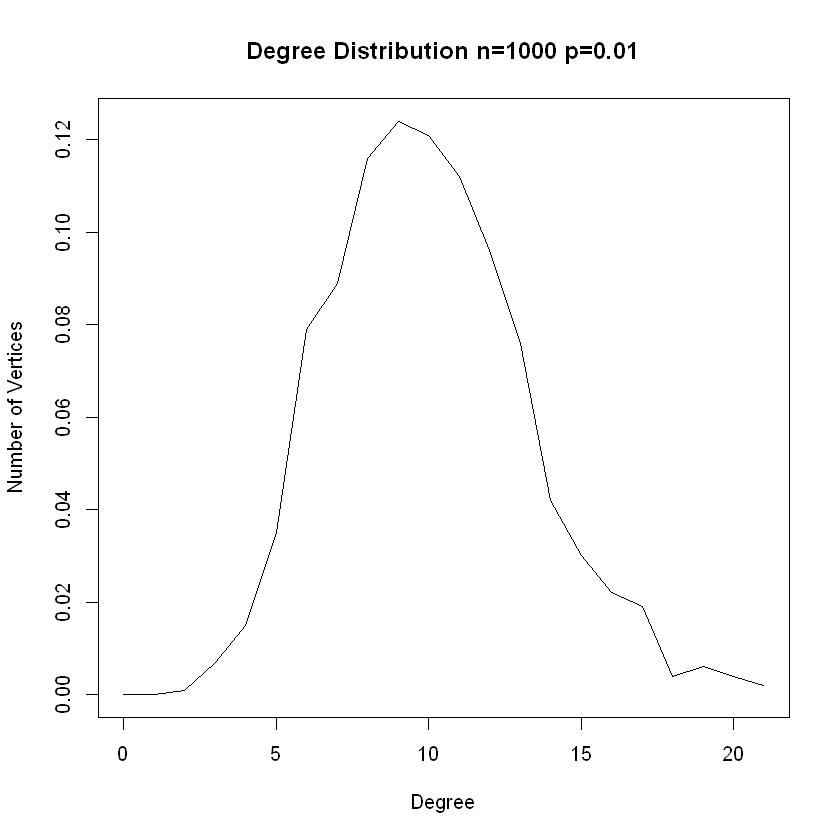

In [80]:
sprintf("For p=0.01 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean_(lab3, dd3), var_(lab3, dd3))
plot(lab3, dd3, type="l", main="Degree Distribution n=1000 p=0.01", xlab="Degree", ylab="Number of Vertices")

[1] "For p=0.05 :"

[1] "Observed Mean = 50.170000    Observed Variance = 45.623100"

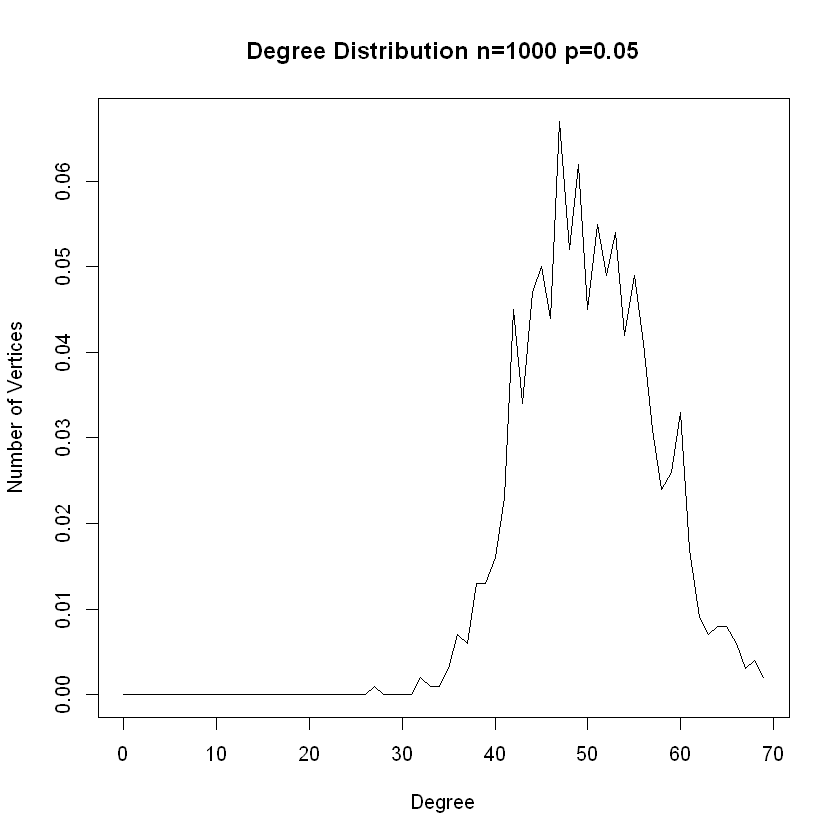

In [81]:
sprintf("For p=0.05 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean_(lab4, dd4), var_(lab4, dd4))
plot(lab4, dd4, type="l", main="Degree Distribution n=1000 p=0.05", xlab="Degree", ylab="Number of Vertices")

[1] "For p=0.1 :"

[1] "Observed Mean = 99.534000    Observed Variance = 88.876844"

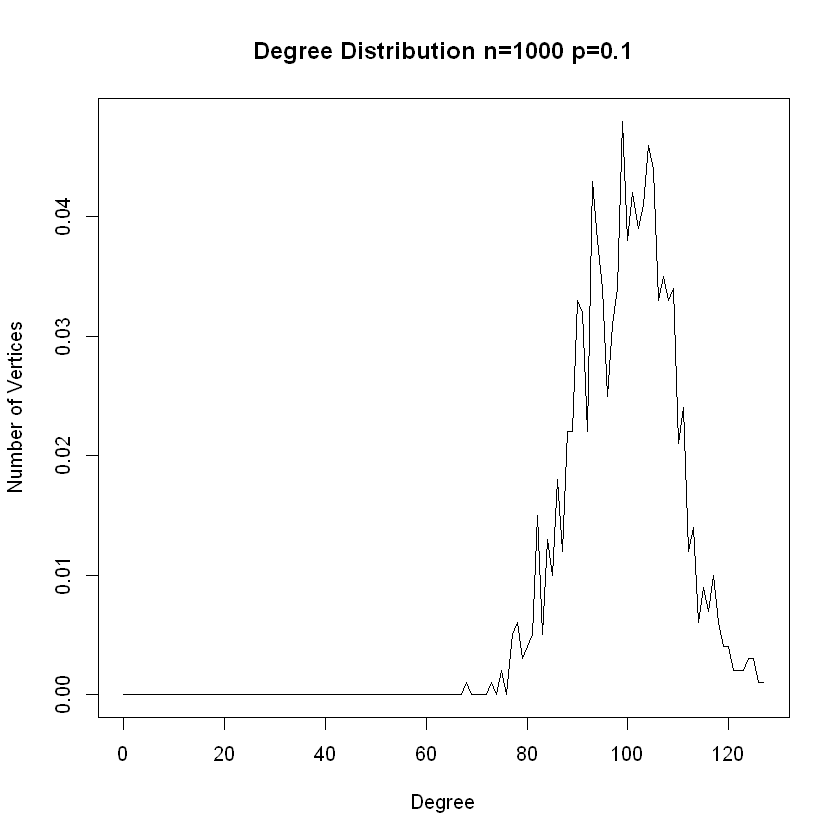

In [82]:
sprintf("For p=0.1 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean_(lab5, dd5), var_(lab5, dd5))
plot(lab5, dd5, type="l", main="Degree Distribution n=1000 p=0.1", xlab="Degree", ylab="Number of Vertices")

In [16]:
# Selecting the Largest Connected Component GCC if the graph is not connected

In [90]:
prob_conn_p <- function(p) {
    conn = 0
    for (i in 1:1000){
       g = sample_gnp(1000, p)
       if (is_connected(g)){
           conn = conn + 1
       } 
    }
    sprintf ("Prob of g with p=%f to be connected is %f", p, conn/1000.0)
}

In [132]:
print_connected_graph_gcc <- function (p){
    for (i in 1:1000){
       g = sample_gnp(1000, p)
       if (!is_connected(g)){
            c = clusters(g)
            i = which.max(c$csize)
            v_bool = c$membership==1
            v = V(g)[v_bool]
            s_g = induced.subgraph(g, v)
            d = diameter(s_g)
            return (c(max(c$csize), d))
       }  
    }
    c = clusters(g)
    i = which.max(c$csize)
    v_bool = c$membership==1
    v = V(g)[v_bool]
    s_g = induced.subgraph(g, v)
    d = diameter(s_g)
    return (c(max(c$csize), d))
}

In [133]:
print_connected_graph_gcc(0.003)
print_connected_graph_gcc(0.004)
print_connected_graph_gcc(0.01)
print_connected_graph_gcc(0.05)
print_connected_graph_gcc(0.1)

[1] 961  13

[1] 976  11

[1] 999   6

[1] 1000    3

[1] 1000    3

In [20]:
print_gcc <- function(g) {
    c = clusters(g)
    i = which.max(c$csize)
    v_bool = c$membership==1
    v = V(g)[v_bool]
    s_g = induced.subgraph(g, v)
    d = diameter(s_g)
    if (is_connected(g)) {
            sprintf ("This graph is connected. Size of GCC is : %d and Diameter of GCC is: %d", max(c$csize), d)
    }
    else {
        sprintf ("Size of GCC is : %d and Diameter of GCC is: %d", max(c$csize), d)
    }  
}

In [28]:
prob_conn_p(0.003)
prob_conn_p(0.004)
prob_conn_p(0.01)
prob_conn_p(0.05)
prob_conn_p(0.1)

[1] "Prob of g with p=0.003000 to be connected is 0.000000"

[1] "Prob of g with p=0.004000 to be connected is 0.000000"

[1] "Prob of g with p=0.010000 to be connected is 0.966000"

[1] "Prob of g with p=0.050000 to be connected is 1.000000"

[1] "Prob of g with p=0.100000 to be connected is 1.000000"

In [23]:
# 1.(c) 

In [24]:
# Selecting a pmax where the graph is always connected

In [83]:
conn_prob <- function(p, th) {
    count = 0
    for (i in 1:1000){
        g = sample_gnp(100, p)
        if (is_connected(g)){
             count = count + 1
        }       
    }
    if ((count/100.0) > th)
        return (TRUE)
    return (FALSE)
}

In [111]:
thresh = 0.8
# conn_prob(0.0001, thresh)
# conn_prob(0.0003, thresh)
# conn_prob(0.0005, thresh)
# conn_prob(0.0006, thresh)
# conn_prob(0.0008, thresh)
# conn_prob(0.001, thresh)
# conn_prob(0.005, thresh)
# conn_prob(0.007, thresh)
# conn_prob(0.008, thresh)
# conn_prob(0.009, thresh)
# conn_prob(0.01, thresh)
# conn_prob(0.011, thresh)
# conn_prob(0.012, thresh)
# conn_prob(0.013, thresh)
# conn_prob(0.015, thresh)
# conn_prob(0.018, thresh)
# conn_prob(0.09, thresh)
conn_prob(0.01, thresh)

[1] FALSE

In [7]:
get_gcc_size <- function(g) {
    c = clusters(g)
    return (max(c$csize))
}

In [136]:
Pmax = 0.01
n = 1000
step = 0.00001

p = 0.0
count = 1

while (p <= Pmax){
    p = p + step
    count  = count + 1
}


all_gccs <- rep(0, 100*(count-1))
all_ps <- rep(0, 100*(count-1))

p_99 <- rep(0, count-1)
norm_gccs <- rep(0, count-1)
ps <- rep(0, count-1)

In [137]:
p = 0.0
count  = 1
all_count = 1
GCClim = 0.99
p_99 <- vector()

while (p < Pmax){
    v <- rep(0, 100)
    gcc = 0
    for (i in 1:100){
        g = sample_gnp(1000, p)
        size = get_gcc_size(g)
        norm_size = size/1000.0
        v[i] = norm_size
        
        if (norm_size >= GCClim){
            gcc = gcc + 1
        }
        
        all_gccs[all_count] = norm_size
        all_ps[all_count] = p
        all_count = all_count + 1
    }
    
    if (gcc >= 95){
        p_99[count] = 1
    }
    norm_gccs[count] = mean(v)
    ps[count] = p
    p = p + step
    count  = count + 1
}

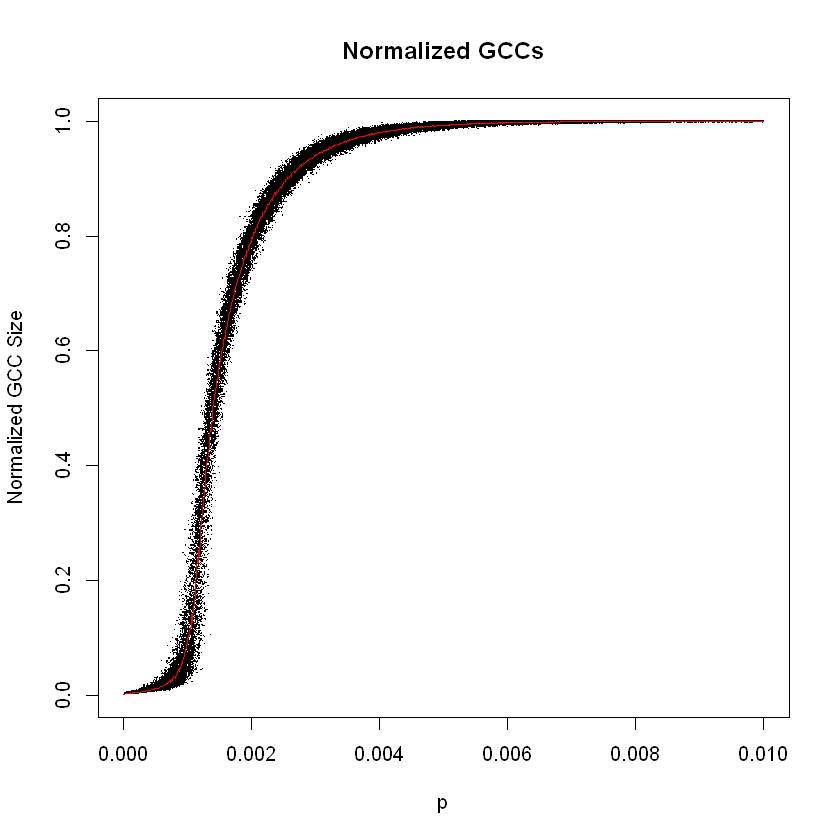

In [32]:
plot(all_ps, all_gccs, type="p", main="Normalized GCCs", xlab="p", ylab="Normalized GCC Size", pch='.')
lines(ps, norm_gccs, col = "red")

In [138]:
gcc_emerge <- function(f) {
    for (x in 1:length(norm_gccs)){
        if (norm_gccs[x] > f){
            return (ps[x])
        }
    }
}

In [141]:
p_emerge = gcc_emerge(0.5)
print (p_emerge)

p_emerge = gcc_emerge(0.6)
print (p_emerge)

p_emerge = gcc_emerge(0.7)
print (p_emerge)

p_emerge = gcc_emerge(0.8)
print (p_emerge)

p_emerge = gcc_emerge(0.9)
print (p_emerge)

p_emerge = gcc_emerge(0.99)
print (p_emerge)

p_emerge = gcc_emerge(0.999)
print (p_emerge)

[1] 0.00139
[1] 0.00153
[1] 0.00173
[1] 0.00203
[1] 0.00255
[1] 0.00462
[1] 0.00681


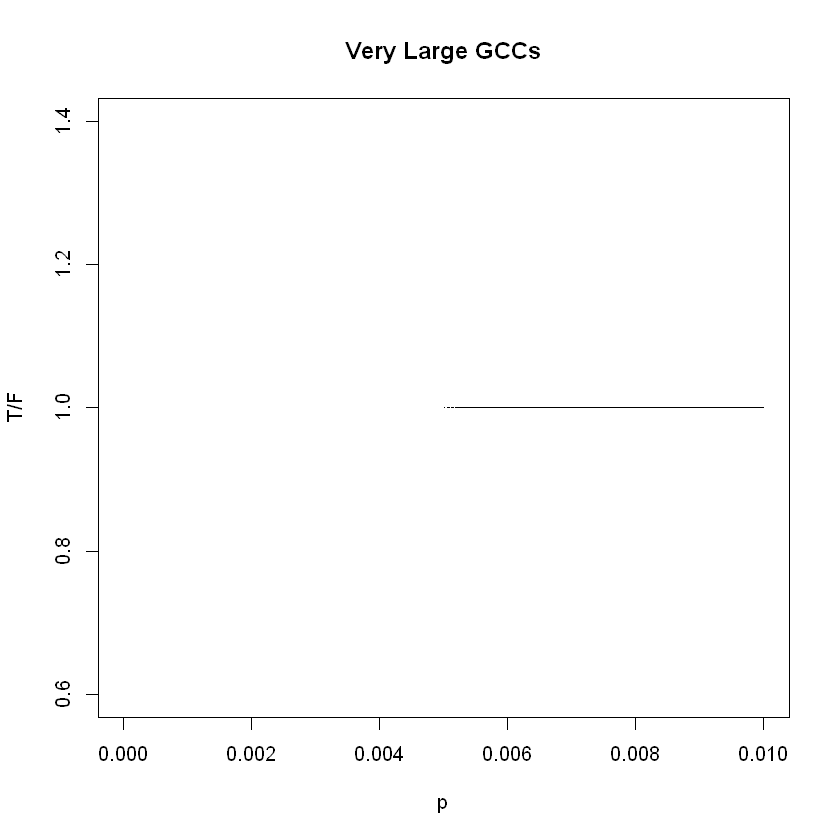

In [140]:
plot(ps, p_99, type="p", main="Very Large GCCs", xlab="p", ylab="T/F", pch=".")

In [11]:
get_gcc_size <- function(g) {
    c = clusters(g)
    return (max(c$csize))
}

exp_gcc_degree <- function(c) {
    count = 0
    for (n in 100:1000){
        count = count + 1
    }

    ns <- rep(0, count)
    gcc_size <- rep(0, count)

    count = 1
    for (n in 100:1000){
        p = c/n
        sizes = 0.0
        for (i in 1:1000){
            g = sample_gnp(n, p)
            sizes = sizes + get_gcc_size(g)
        }
        sizes = sizes/1000.0
        ns[count] = n
        gcc_size[count] = sizes
        count = count + 1
    }
    
    return (list(ns,gcc_size))
}


In [12]:
c = 0.5
ng1 = exp_gcc_degree(c)
ns1 = ng1[[1]]
gccs1 = ng1[[2]]

In [59]:
xaxis = seq(100,1000,1)
yaxis_log = log10(xaxis)
yaxis_23 = xaxis^(2/3.0)
yaxis_gcc_l = xaxis*0.1
yaxis_gcc_u = xaxis*0.5

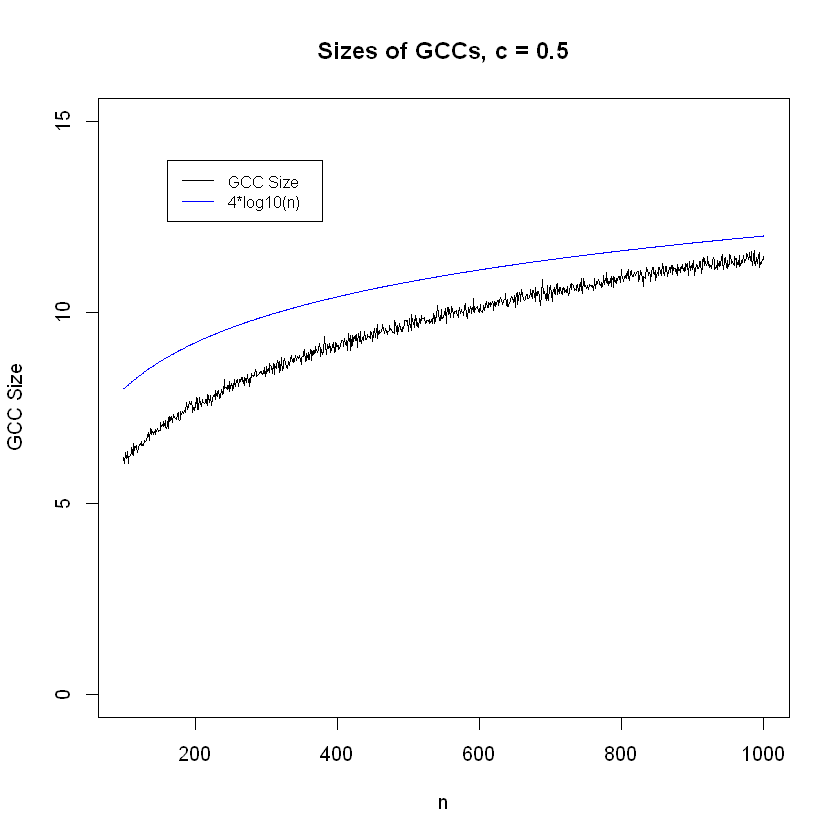

In [42]:
plot(ns1, gccs1, type="l", main="Sizes of GCCs, c = 0.5", xlab="n", ylab="GCC Size", pch = ".", ylim=c(0,15))
lines(xaxis, 4*yaxis_log, col="blue")
legend("topleft", inset=0.1, legend=c("GCC Size", "4*log10(n)"),
       col=c("black", "blue"), lty=1:1, cex=0.8)

In [13]:
c = 1.0
ng2 = exp_gcc_degree(c)
ns2 = ng2[[1]]
gccs2 = ng2[[2]]

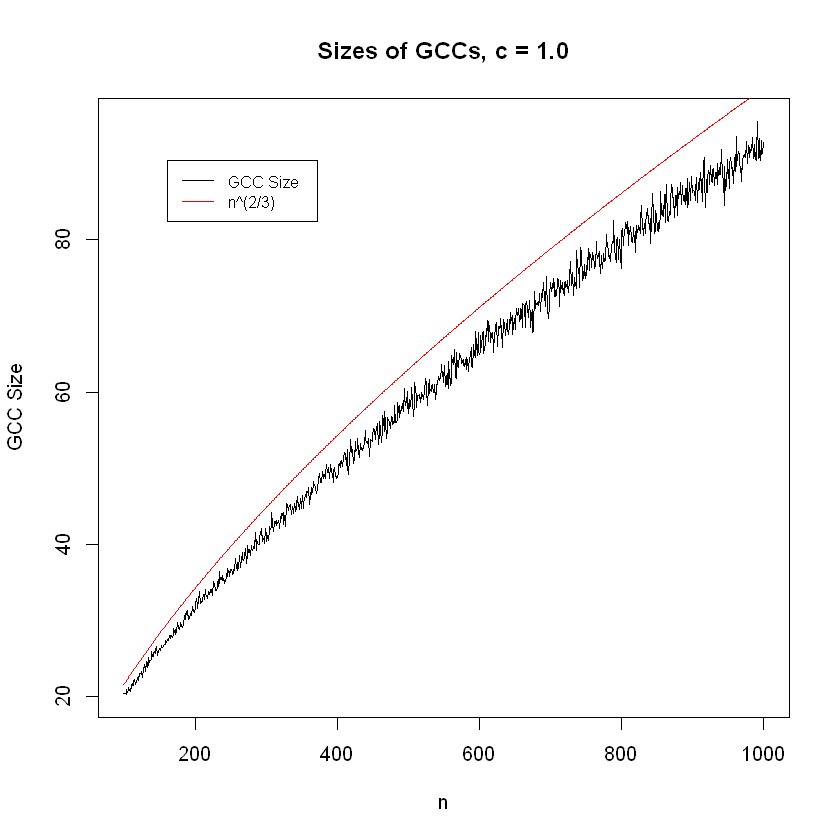

In [47]:
plot(ns2, gccs2, type="l", main="Sizes of GCCs, c = 1.0", xlab="n", ylab="GCC Size", pch = ".")
lines(xaxis, yaxis_23, col="red")
legend("topleft", inset=0.1, legend=c("GCC Size", "n^(2/3)"),
       col=c("black", "red"), lty=1:1, cex=0.8)

In [14]:
c = 1.1
ng3 = exp_gcc_degree(c)
ns3 = ng3[[1]]
gccs3 = ng3[[2]]

In [15]:
c = 1.2
ng4 = exp_gcc_degree(c)
ns4 = ng4[[1]]
gccs4 = ng4[[2]]

In [16]:
c = 1.3
ng5 = exp_gcc_degree(c)
ns5 = ng5[[1]]
gccs5 = ng5[[2]]

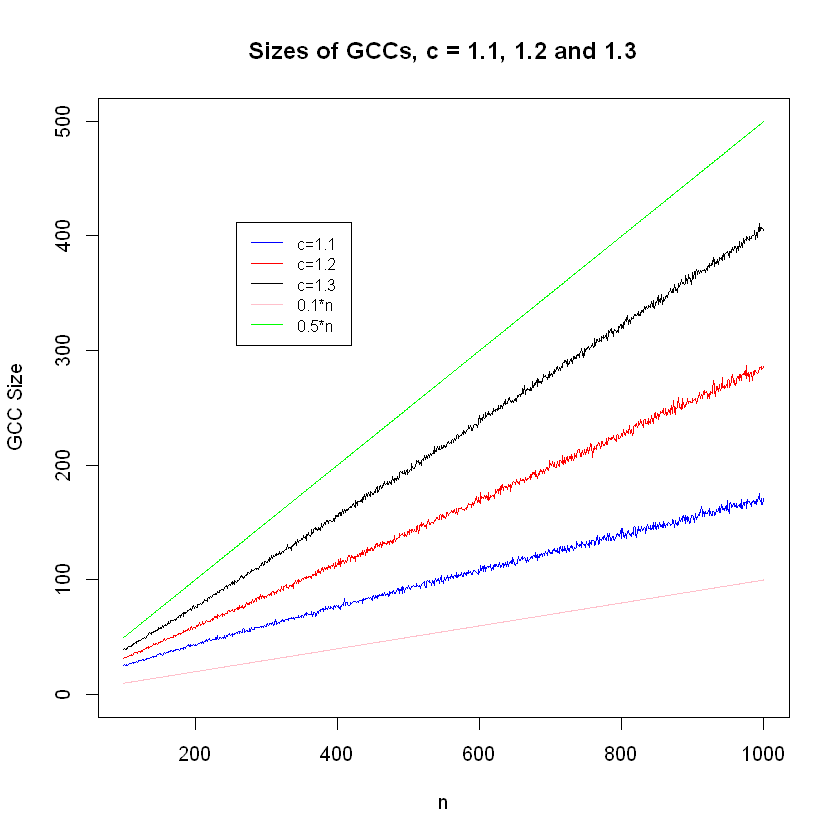

In [60]:
plot(ns5, gccs5, type="l", main="Sizes of GCCs, c = 1.1, 1.2 and 1.3", xlab="n", ylab="GCC Size", pch = ".", ylim=c(0,500))
lines(ns4, gccs4, col = "red")
lines(ns3, gccs3, col = "blue")
lines(xaxis, yaxis_gcc_l, col="pink")
lines(xaxis, yaxis_gcc_u, col="green")
legend("topleft", inset=0.2, legend=c("c=1.1", "c=1.2", "c=1.3", "0.1*n", "0.5*n"),
       col=c("blue", "red", "black", "pink", "green"), lty=1:1, cex=0.8)

In [79]:
# Question 2 - Preferential Attatchment Model

In [80]:
#(a) Barbasi Albert Model

In [63]:
conn = 1
for (i in 1:1000){
    g_pa_t = sample_pa(n=1000, m=1, directed=FALSE)
    conn = conn & (is_connected(g_pa_t))
}
print (conn)

[1] TRUE


In [92]:
g_pa = sample_pa(n=1000, m=1, directed=FALSE)
r1 = cluster_fast_greedy(g_pa)
r1_mem = membership(r1)
modularity(g_pa, r1_mem)

[1] 0.930704

In [93]:
g_pa_big = sample_pa(n=10000, m=1, directed=FALSE)
r2 = cluster_fast_greedy(g_pa_big)
r2_mem = membership(r2)
modularity(g_pa_big, r2_mem)

[1] 0.9790154

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"17 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"

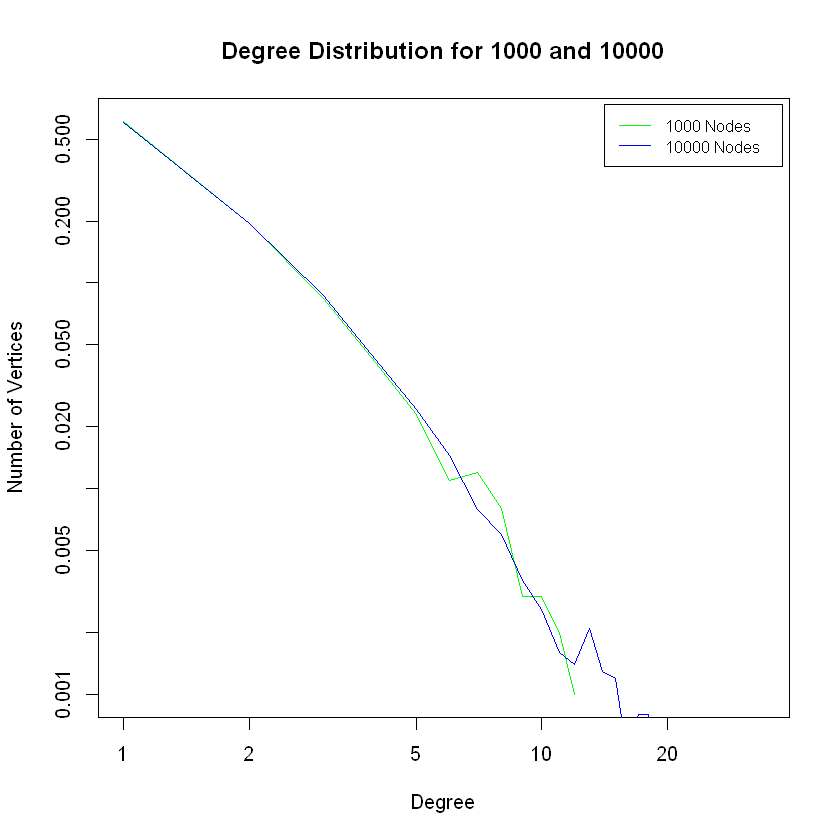

In [106]:
dd1 = degree_distribution(g_pa)
lab1 = seq(0, length(dd1)-1)
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="green", log="xy")

dd2 = degree_distribution(g_pa_big)
lab2 = seq(0, length(dd2)-1)
lines(lab2, dd2, col = "blue", log="xy")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

In [114]:
df1 <- data.frame("degree"=log(lab1), "freq"=log(dd1))
df1 <- df1[!is.infinite(rowSums(df1)),]

In [115]:
df2 <- data.frame("degree"=log(lab2), "freq"=log(dd2))
df2 <- df2[!is.infinite(rowSums(df2)),]

In [116]:
relation1 <- lm(freq ~ degree, df1[1:13,])
# relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

In [117]:
relation2 <- lm(freq ~ degree, df2[1:13,])
# relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

In [118]:
relation1


relation2


Call:
lm(formula = freq ~ degree, data = df1[1:13, ])

Coefficients:
(Intercept)       degree  
   -0.08108     -2.42348  



Call:
lm(formula = freq ~ degree, data = df2[1:13, ])

Coefficients:
(Intercept)       degree  
    0.01152     -2.50753  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"17 y values <= 0 omitted from logarithmic plot"

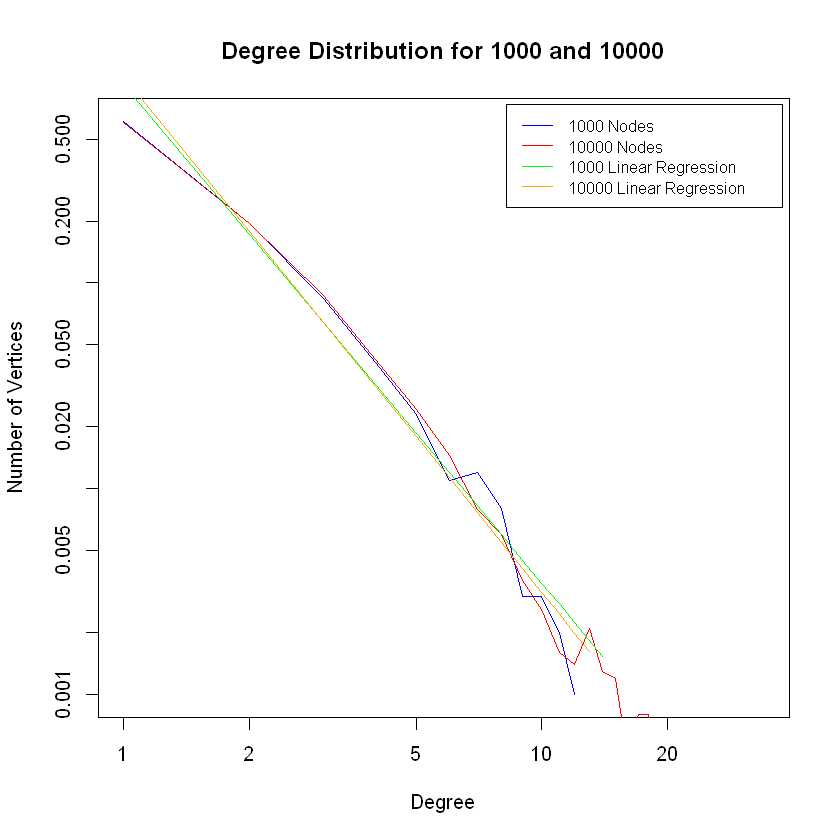

In [119]:
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="blue", log="xy")
lines(lab2, dd2, col = "red", type="l")

lines(exp(df1[["degree"]][1:13]), exp(pred1), type="l" ,col = "green")
lines(exp(df2[["degree"]][1:13]), exp(pred2), type="l", col = "orange")


# lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "green")
# lines(exp(df2[["degree"]]), exp(pred2), type="l", col = "orange")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes", "1000 Linear Regression", "10000 Linear Regression"),
       col=c("blue", "red", "green", "orange"), lty=1:1, cex=0.8)

In [110]:
# Choosing 100 samples from the graph with 1000 nodes
# Choosinf 1000 samples from the graph with 10,000 nodes

samples1 = sample(1:1000, 400, replace=1)
samples2 = sample(1:10000, 4000, replace=1)

In [111]:
vs1 = adjacent_vertices(g_pa, samples1)
vs2 = adjacent_vertices(g_pa_big, samples2)

In [112]:
degs1 <- rep(0, length(vs1))
for (k in 1:length(vs1)){
  ind = sample(1:length(vs1[[k]]), 1)
  degs1[k] = degree(g_pa, vs1[[k]][ind])
  }  

cts1 = as.data.frame(table(degs1))

# inds1 <- vector() 
# degs1 <- vector()
# for (k in 1:length(vs1)){
#   ind = sample(1:length(vs1[[k]]), 1)
#   degs1 <- c(degs1 ,degree(g_pa, vs1[[k]][ind]))
#   inds1 <- c(inds1, vs1[[k]][ind])  
#   }  

In [113]:
degs2 <- rep(0, length(vs2))
for (k in 1:length(vs2)){
  ind = sample(1:length(vs2[[k]]), 1)
  degs2[k] = degree(g_pa_big, vs2[[k]][ind])
  }  

cts2 = as.data.frame(table(degs2))

# inds2 <- vector() 
# degs2 <- vector()
# for (k in 1:length(vs2)){
#   ind = sample(1:length(vs2[[k]]), 1)
#   degs2 <- c(degs2 ,degree(g_pa_big, vs2[[k]][ind]))
#   inds2 <- c(inds2, vs2[[k]][ind])  
#   } 

In [114]:
cts1_deg = rep(0,length(cts1[["degs1"]]))
cts1_freq = rep(0,length(cts1[["Freq"]]))

for (x in 1:length(cts1[["degs1"]])){
    cts1_deg[x] = cts1[["degs1"]][x]
    cts1_freq[x] = cts1[["Freq"]][x]/400.0
}


cts2_deg = rep(0,length(cts2[["degs2"]]))
cts2_freq = rep(0,length(cts2[["Freq"]]))

for (x in 1:length(cts2[["degs2"]])){
    cts2_deg[x] = cts2[["degs2"]][x]
    cts2_freq[x] = cts2[["Freq"]][x]/4000.0
}

In [115]:
df1 <- data.frame("degree"=log(cts1_deg), "freq"=log(cts1_freq))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(cts2_deg), "freq"=log(cts2_freq))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1

relation2


Call:
lm(formula = freq ~ degree, data = df1)

Coefficients:
(Intercept)       degree  
     -1.324       -1.009  



Call:
lm(formula = freq ~ degree, data = df2)

Coefficients:
(Intercept)       degree  
    -0.6256      -1.5145  


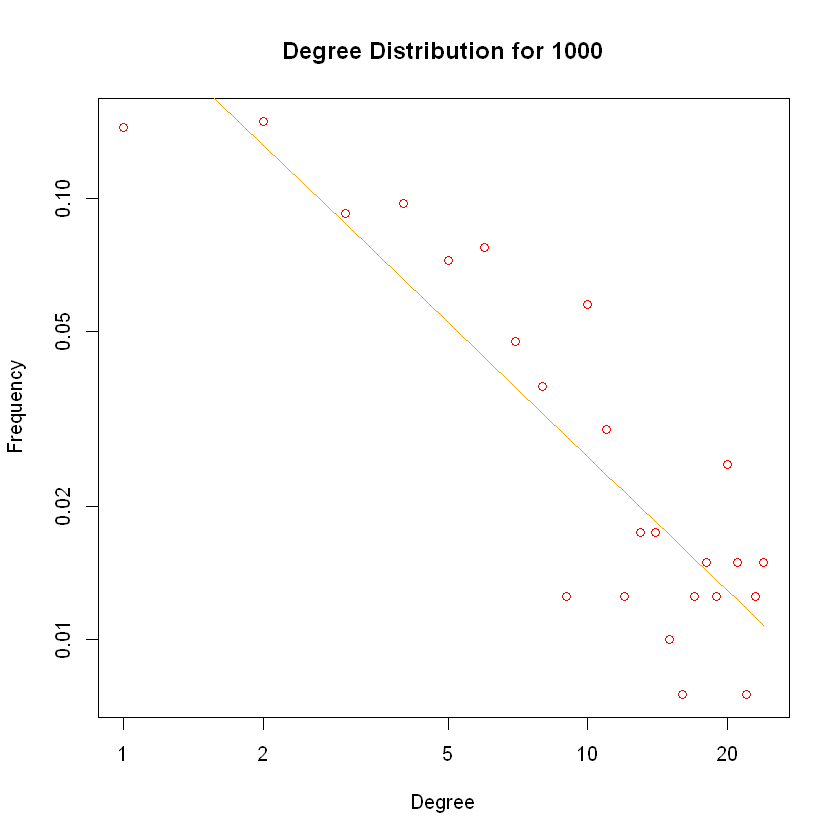

In [116]:
plot(cts1_deg, cts1_freq, type = "p", col="red", main="Degree Distribution for 1000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "orange")


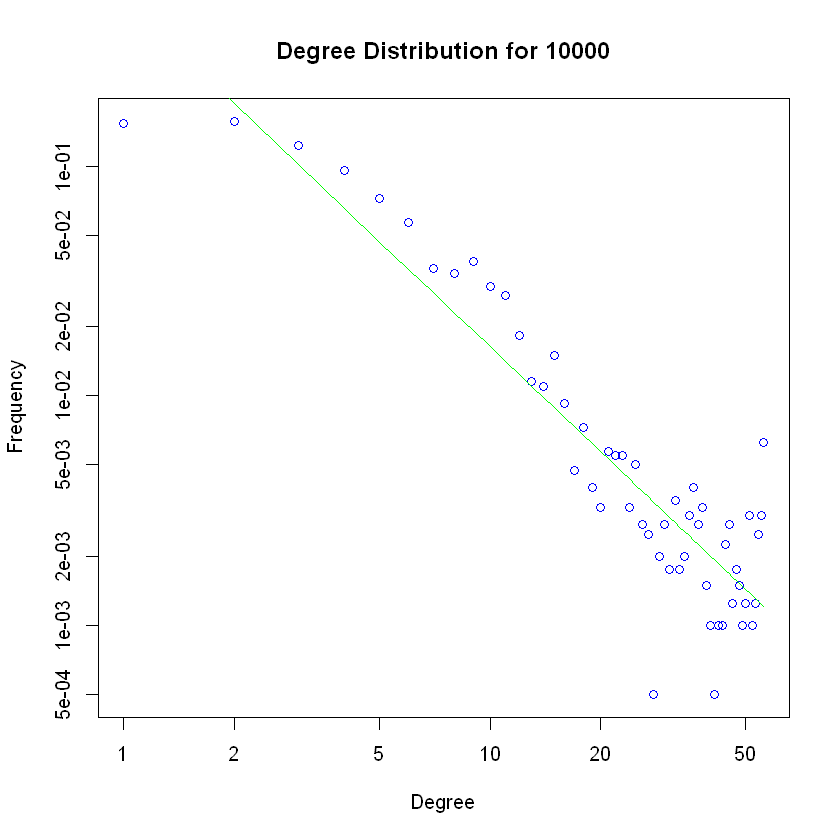

In [117]:
plot(cts2_deg, cts2_freq,, type = "p", col="blue", main="Degree Distribution for 10000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df2[["degree"]]), exp(pred2), type="l" ,col = "green")

In [120]:
all_degrees1 = degree(g_pa, 1:1000)
all_degrees2 = degree(g_pa_big, 1:1000)

In [121]:
df1 <- data.frame("degree"=log(all_degrees1), "node"=log(c(1:1000)))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(all_degrees2), "node"=log(c(1:1000)))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(degree ~ node, df1)
pred1 = predict(relation1)

relation2 <- lm(degree ~ node, df2)
pred2 = predict(relation2)

relation1

relation2


Call:
lm(formula = degree ~ node, data = df1)

Coefficients:
(Intercept)         node  
     2.8811      -0.4155  



Call:
lm(formula = degree ~ node, data = df2)

Coefficients:
(Intercept)         node  
     3.7429      -0.4004  


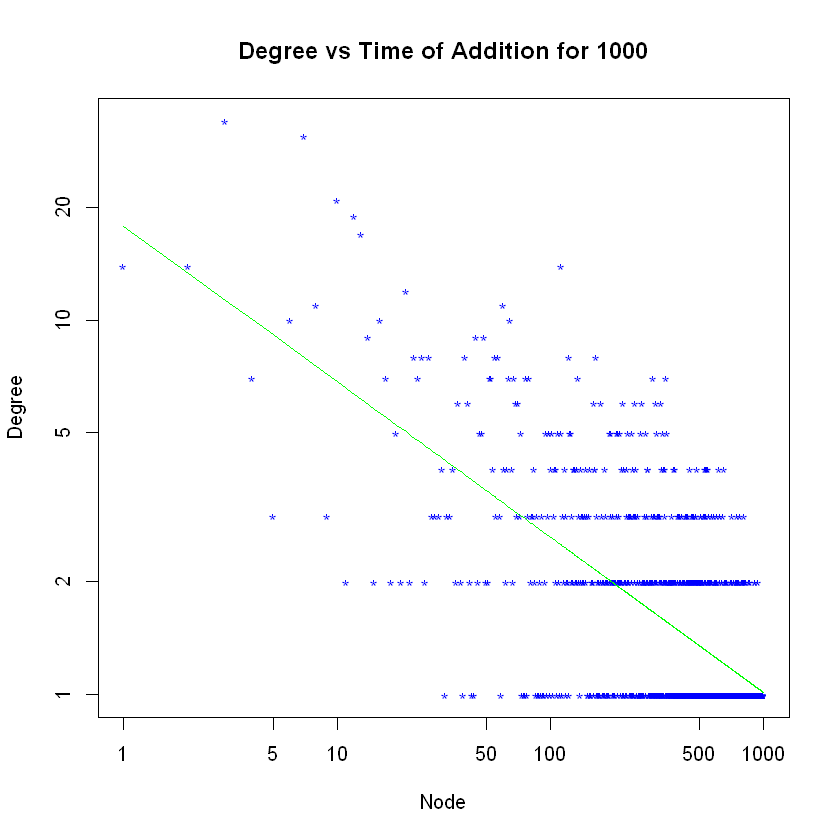

In [122]:
plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree vs Time of Addition for 1000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

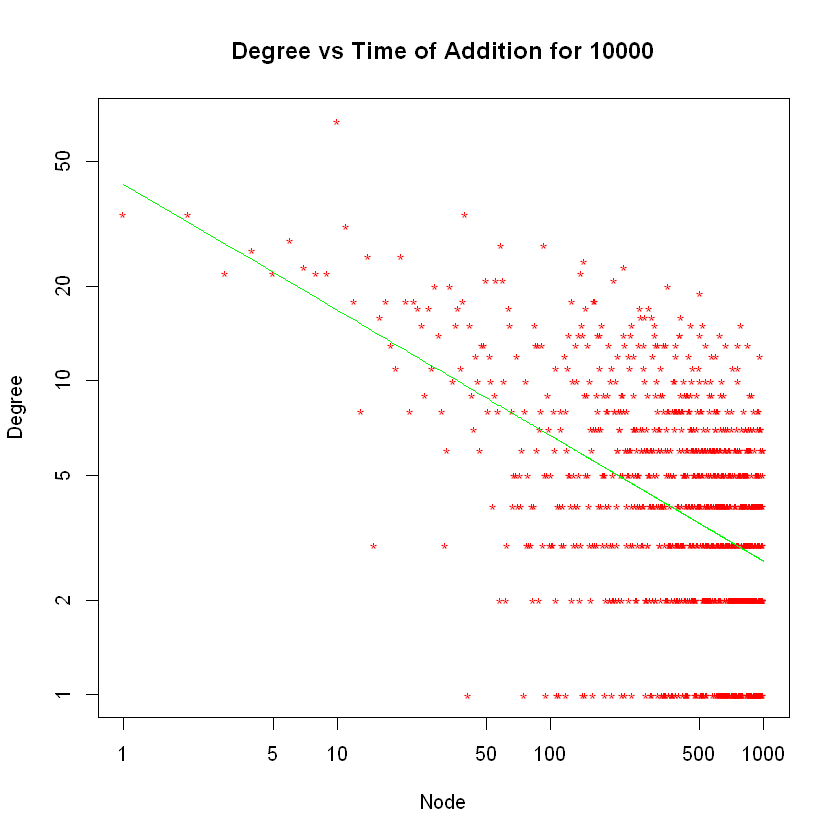

In [123]:
plot(1:1000, all_degrees2, type = "p", col="red", main="Degree vs Time of Addition for 10000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

[1] 0.5217975

[1] 0.5308579

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"10 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"


Call:
lm(formula = freq ~ degree, data = df1[1:13, ])

Coefficients:
(Intercept)       degree  
      1.284       -2.589  



Call:
lm(formula = freq ~ degree, data = df2[1:13, ])

Coefficients:
(Intercept)       degree  
      1.165       -2.492  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"10 y values <= 0 omitted from logarithmic plot"

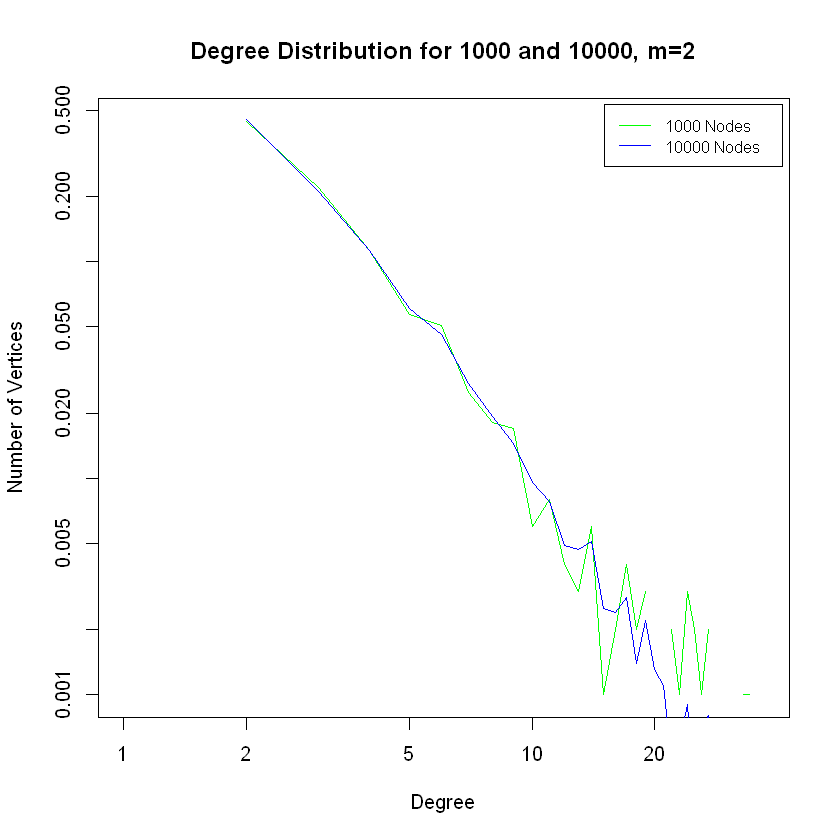


Call:
lm(formula = freq ~ degree, data = df1)

Coefficients:
(Intercept)       degree  
     -1.234       -1.128  



Call:
lm(formula = freq ~ degree, data = df2)

Coefficients:
(Intercept)       degree  
    -0.5918      -1.5375  


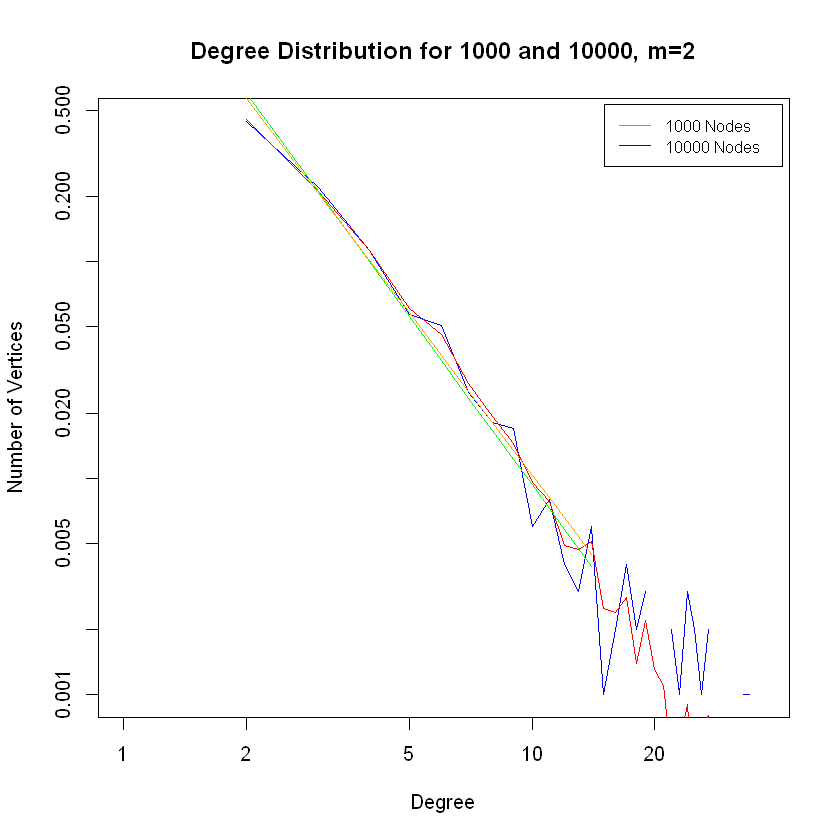

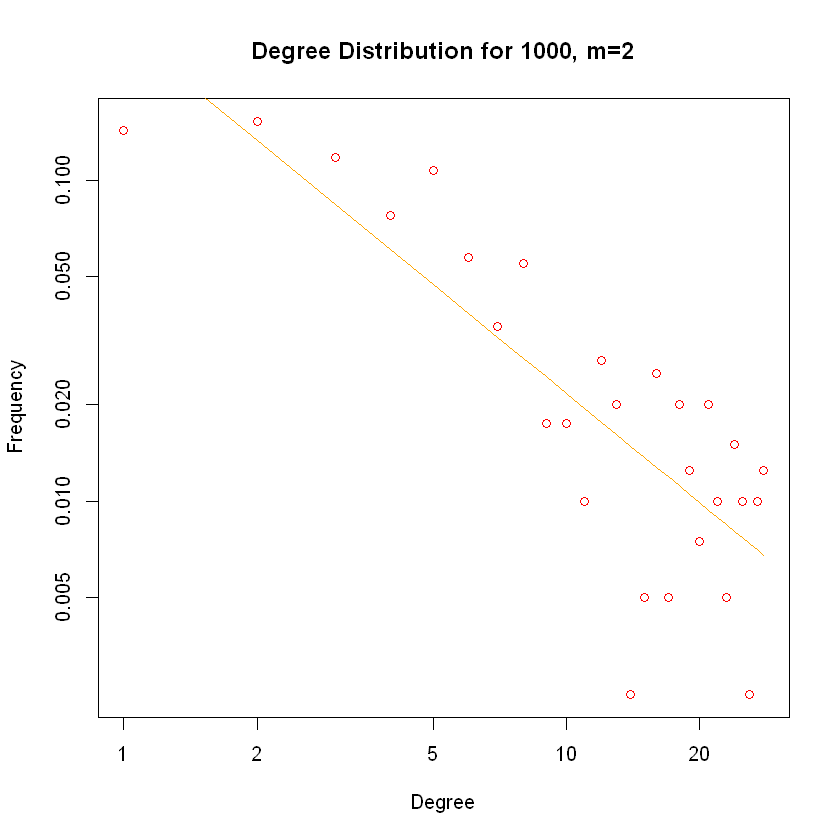


Call:
lm(formula = degree ~ node, data = df1)

Coefficients:
(Intercept)         node  
     3.8525      -0.4549  



Call:
lm(formula = degree ~ node, data = df2)

Coefficients:
(Intercept)         node  
      4.615       -0.411  


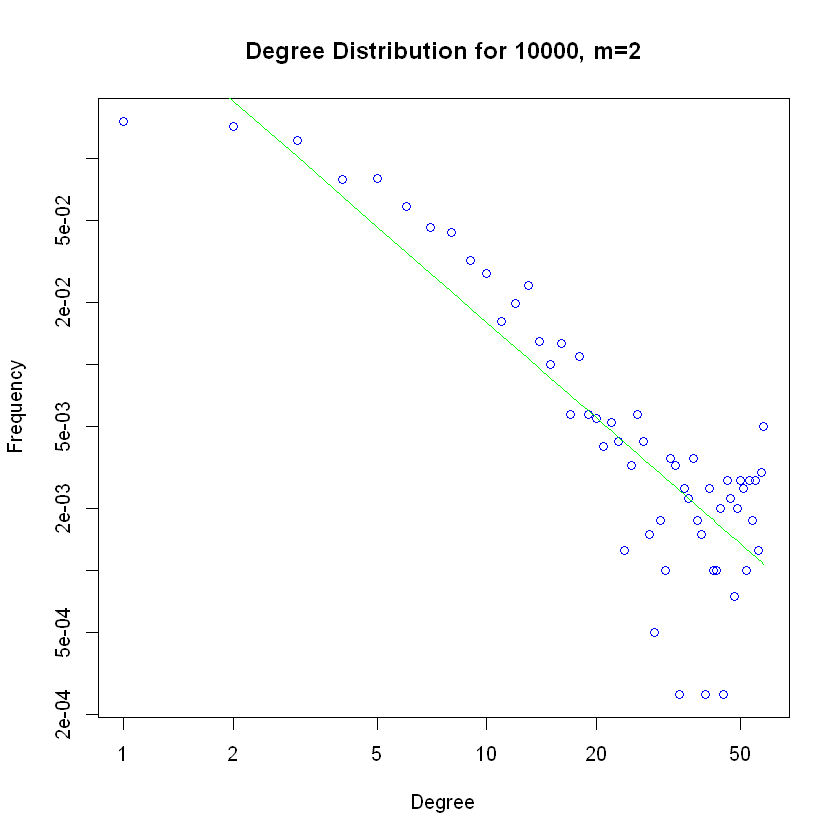

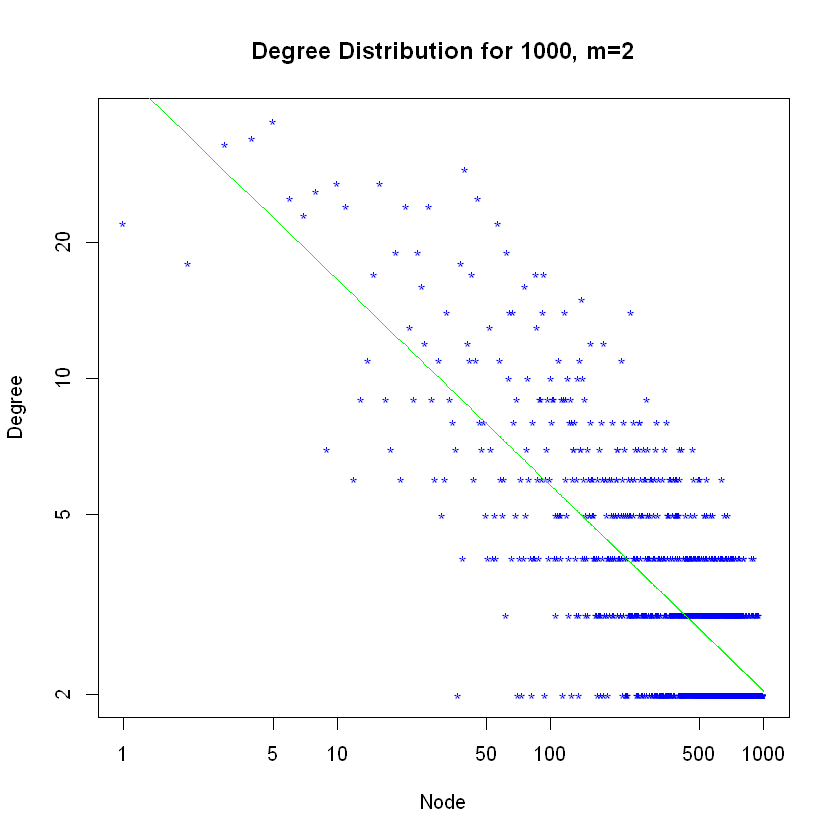

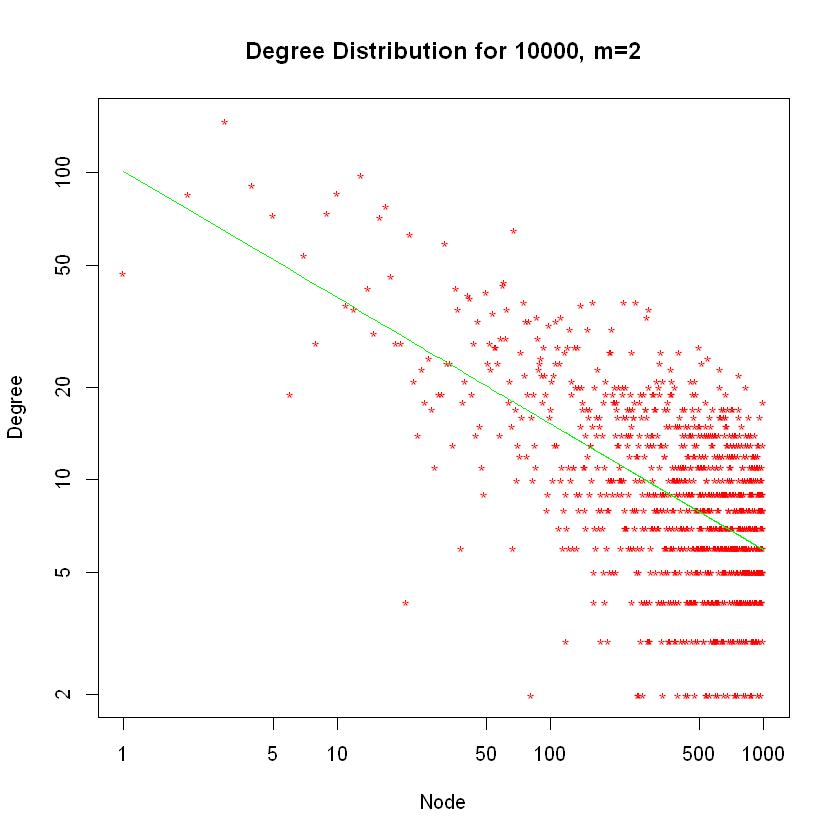

In [70]:
# For m=2

g_pa = sample_pa(n=1000, m=2, directed=FALSE)
r1 = cluster_fast_greedy(g_pa, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa, r1_mem)

g_pa_big = sample_pa(n=10000, m=2, directed=FALSE)
r2 = cluster_fast_greedy(g_pa_big, merges = FALSE, modularity = FALSE, membership = TRUE)
r2_mem = membership(r2)
modularity(g_pa_big, r2_mem)

dd1 = degree_distribution(g_pa)
lab1 = seq(0, length(dd1)-1)
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000, m=2", xlab="Degree", ylab="Number of Vertices", col="green", log="xy")

dd2 = degree_distribution(g_pa_big)
lab2 = seq(0, length(dd2)-1)
lines(lab2, dd2, col = "blue", log="xy")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

df1 <- data.frame("degree"=log(lab1), "freq"=log(dd1))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(lab2), "freq"=log(dd2))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1[1:13,])
# relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2[1:13,])
# relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1


relation2

plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000, m=2", xlab="Degree", ylab="Number of Vertices", col="blue", log="xy")
lines(lab2, dd2, col = "red", type="l")

lines(exp(df1[["degree"]][1:13]), exp(pred1), type="l" ,col = "green")
lines(exp(df2[["degree"]][1:13]), exp(pred2), type="l", col = "orange")

# lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "green")
# lines(exp(df2[["degree"]]), exp(pred2), type="l", col = "orange")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

# Choosing 100 samples from the graph with 1000 nodes
# Choosinf 1000 samples from the graph with 10,000 nodes

samples1 = sample(1:1000, 400, replace=1)
samples2 = sample(1:10000, 4000, replace=1)

vs1 = adjacent_vertices(g_pa, samples1)
vs2 = adjacent_vertices(g_pa_big, samples2)

degs1 <- rep(0, length(vs1))
for (k in 1:length(vs1)){
  ind = sample(1:length(vs1[[k]]), 1)
  degs1[k] = degree(g_pa, vs1[[k]][ind])
  }  

cts1 = as.data.frame(table(degs1))

degs2 <- rep(0, length(vs2))
for (k in 1:length(vs2)){
  ind = sample(1:length(vs2[[k]]), 1)
  degs2[k] = degree(g_pa_big, vs2[[k]][ind])
  }  

cts2 = as.data.frame(table(degs2))

cts1_deg = rep(0,length(cts1[["degs1"]]))
cts1_freq = rep(0,length(cts1[["Freq"]]))

for (x in 1:length(cts1[["degs1"]])){
    cts1_deg[x] = cts1[["degs1"]][x]
    cts1_freq[x] = cts1[["Freq"]][x]/400.0
}


cts2_deg = rep(0,length(cts2[["degs2"]]))
cts2_freq = rep(0,length(cts2[["Freq"]]))

for (x in 1:length(cts2[["degs2"]])){
    cts2_deg[x] = cts2[["degs2"]][x]
    cts2_freq[x] = cts2[["Freq"]][x]/4000.0
}

df1 <- data.frame("degree"=log(cts1_deg), "freq"=log(cts1_freq))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(cts2_deg), "freq"=log(cts2_freq))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1

relation2

plot(cts1_deg, cts1_freq, type = "p", col="red", main="Degree Distribution for 1000, m=2", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "orange")

plot(cts2_deg, cts2_freq,, type = "p", col="blue", main="Degree Distribution for 10000, m=2", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df2[["degree"]]), exp(pred2), type="l" ,col = "green")

all_degrees1 = degree(g_pa, 1:1000)
all_degrees2 = degree(g_pa_big, 1:1000)

df1 <- data.frame("degree"=log(all_degrees1), "node"=log(c(1:1000)))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(all_degrees2), "node"=log(c(1:1000)))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(degree ~ node, df1)
pred1 = predict(relation1)

relation2 <- lm(degree ~ node, df2)
pred2 = predict(relation2)

relation1

relation2

plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree vs Time of Addition for 1000, m=2", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

plot(1:1000, all_degrees2, type = "p", col="red", main="Degree vs Time of Addition for 10000, m=2", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

[1] 0.2835707

[1] 0.2731795

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"80 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"


Call:
lm(formula = freq ~ degree, data = df1[1:13, ])

Coefficients:
(Intercept)       degree  
      3.551       -2.901  



Call:
lm(formula = freq ~ degree, data = df2[1:13, ])

Coefficients:
(Intercept)       degree  
      3.048       -2.662  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"80 y values <= 0 omitted from logarithmic plot"

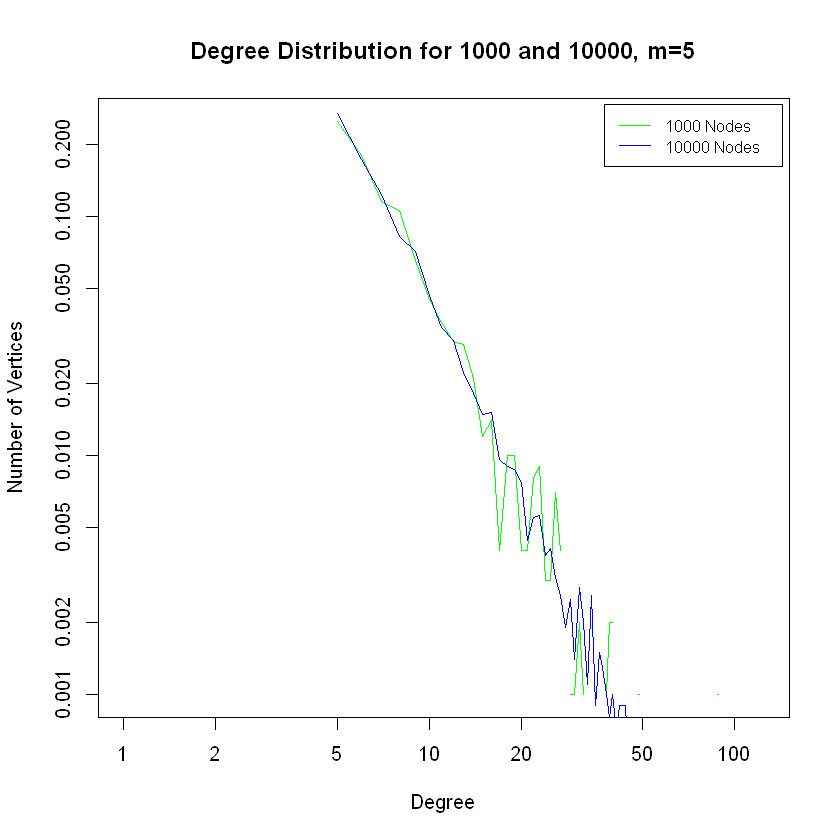


Call:
lm(formula = freq ~ degree, data = df1)

Coefficients:
(Intercept)       degree  
    -1.7482      -0.8903  



Call:
lm(formula = freq ~ degree, data = df2)

Coefficients:
(Intercept)       degree  
     -1.119       -1.267  


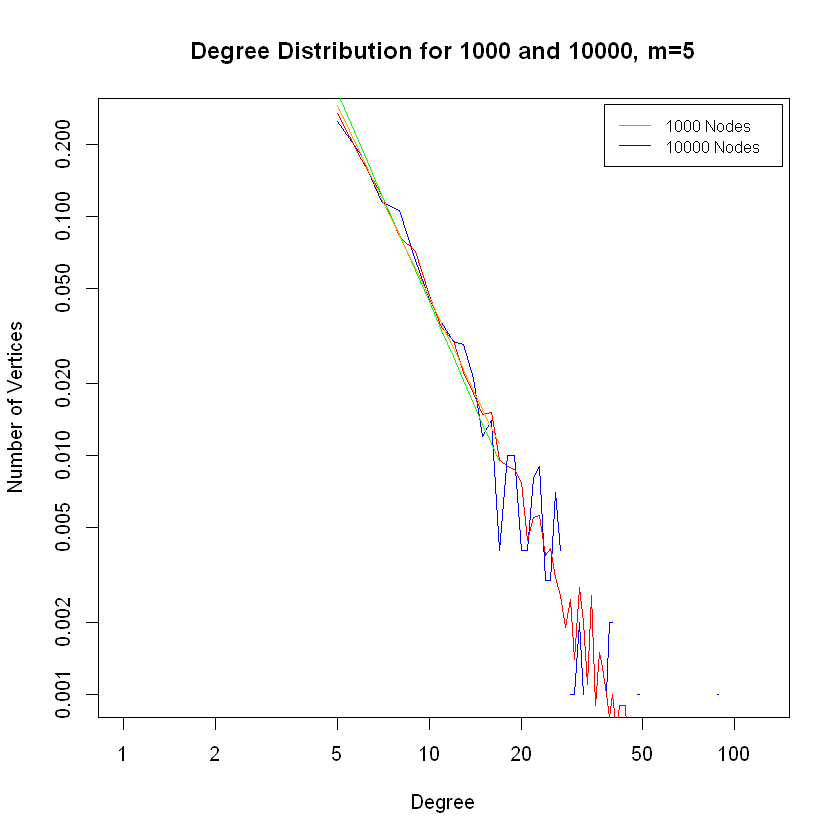

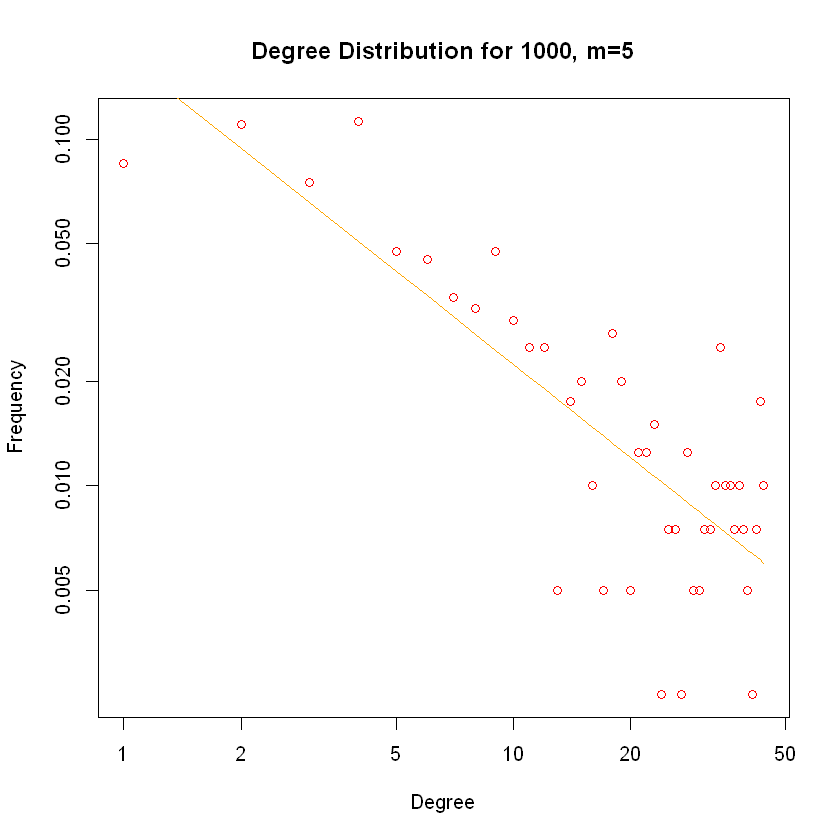


Call:
lm(formula = degree ~ node, data = df1)

Coefficients:
(Intercept)         node  
     4.9668      -0.4842  



Call:
lm(formula = degree ~ node, data = df2)

Coefficients:
(Intercept)         node  
     6.0302      -0.4794  


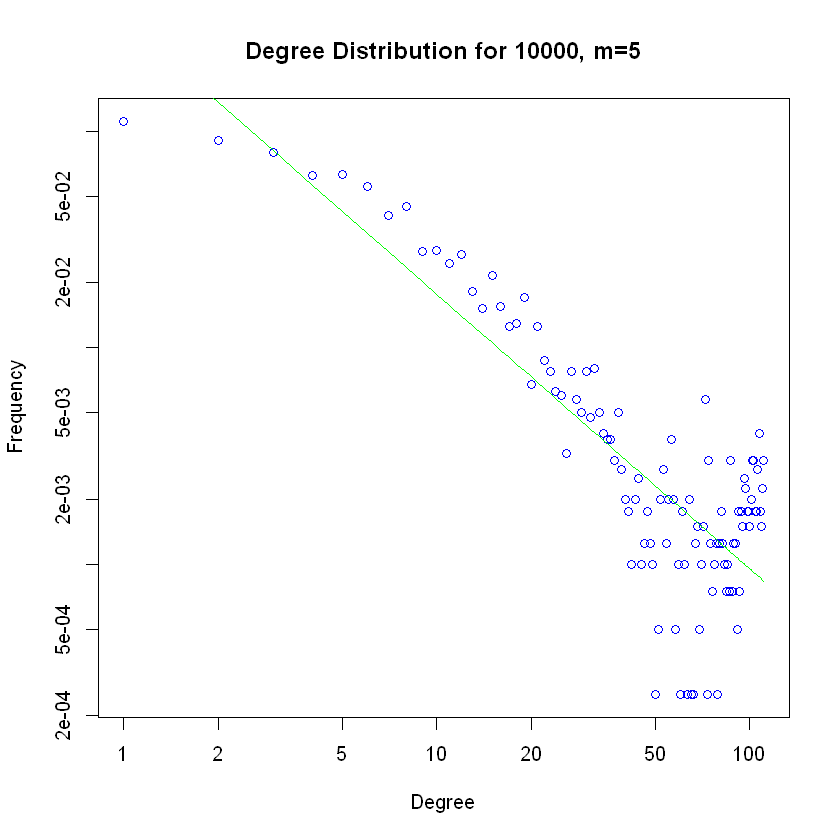

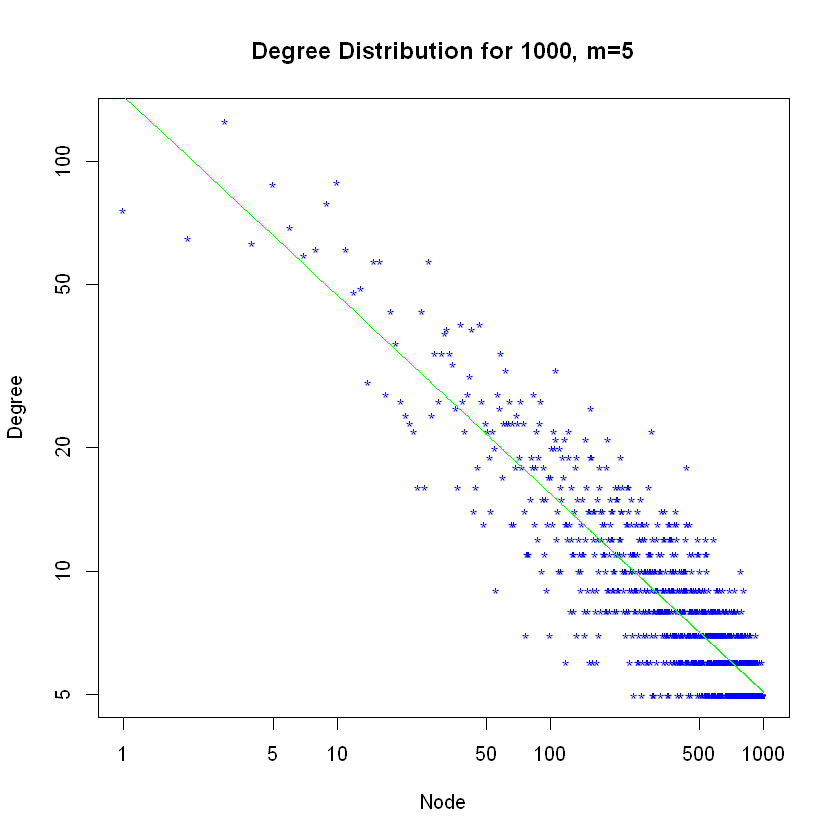

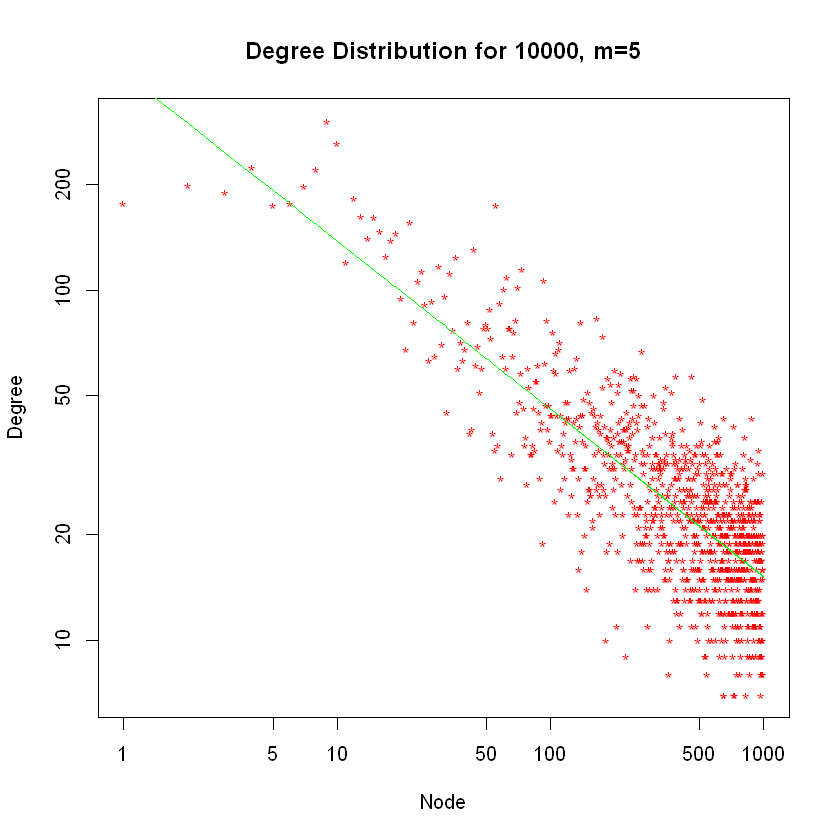

In [71]:
# For m=5

g_pa = sample_pa(n=1000, m=5, directed=FALSE)
r1 = cluster_fast_greedy(g_pa, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa, r1_mem)

g_pa_big = sample_pa(n=10000, m=5, directed=FALSE)
r2 = cluster_fast_greedy(g_pa_big, merges = FALSE, modularity = FALSE, membership = TRUE)
r2_mem = membership(r2)
modularity(g_pa_big, r2_mem)

dd1 = degree_distribution(g_pa)
lab1 = seq(0, length(dd1)-1)
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000, m=5", xlab="Degree", ylab="Number of Vertices", col="green", log="xy")

dd2 = degree_distribution(g_pa_big)
lab2 = seq(0, length(dd2)-1)
lines(lab2, dd2, col = "blue", log="xy")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

df1 <- data.frame("degree"=log(lab1), "freq"=log(dd1))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(lab2), "freq"=log(dd2))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1[1:13,])
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2[1:13,])
pred2 = predict(relation2)

relation1


relation2

plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000, m=5", xlab="Degree", ylab="Number of Vertices", col="blue", log="xy")
lines(lab2, dd2, col = "red", type="l")

lines(exp(df1[["degree"]][1:13]), exp(pred1), type="l" ,col = "green")
lines(exp(df2[["degree"]][1:13]), exp(pred2), type="l", col = "orange")

legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

# Choosing 100 samples from the graph with 1000 nodes
# Choosinf 1000 samples from the graph with 10,000 nodes

samples1 = sample(1:1000, 400, replace=1)
samples2 = sample(1:10000, 4000, replace=1)

vs1 = adjacent_vertices(g_pa, samples1)
vs2 = adjacent_vertices(g_pa_big, samples2)

degs1 <- rep(0, length(vs1))
for (k in 1:length(vs1)){
  ind = sample(1:length(vs1[[k]]), 1)
  degs1[k] = degree(g_pa, vs1[[k]][ind])
  }  

cts1 = as.data.frame(table(degs1))

degs2 <- rep(0, length(vs2))
for (k in 1:length(vs2)){
  ind = sample(1:length(vs2[[k]]), 1)
  degs2[k] = degree(g_pa_big, vs2[[k]][ind])
  }  

cts2 = as.data.frame(table(degs2))

cts1_deg = rep(0,length(cts1[["degs1"]]))
cts1_freq = rep(0,length(cts1[["Freq"]]))

for (x in 1:length(cts1[["degs1"]])){
    cts1_deg[x] = cts1[["degs1"]][x]
    cts1_freq[x] = cts1[["Freq"]][x]/400.0
}


cts2_deg = rep(0,length(cts2[["degs2"]]))
cts2_freq = rep(0,length(cts2[["Freq"]]))

for (x in 1:length(cts2[["degs2"]])){
    cts2_deg[x] = cts2[["degs2"]][x]
    cts2_freq[x] = cts2[["Freq"]][x]/4000.0
}

df1 <- data.frame("degree"=log(cts1_deg), "freq"=log(cts1_freq))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(cts2_deg), "freq"=log(cts2_freq))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1

relation2

plot(cts1_deg, cts1_freq, type = "p", col="red", main="Degree Distribution for 1000, m=5", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "orange")

plot(cts2_deg, cts2_freq,, type = "p", col="blue", main="Degree Distribution for 10000, m=5", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df2[["degree"]]), exp(pred2), type="l" ,col = "green")

all_degrees1 = degree(g_pa, 1:1000)
all_degrees2 = degree(g_pa_big, 1:1000)

df1 <- data.frame("degree"=log(all_degrees1), "node"=log(c(1:1000)))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(all_degrees2), "node"=log(c(1:1000)))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(degree ~ node, df1)
pred1 = predict(relation1)

relation2 <- lm(degree ~ node, df2)
pred2 = predict(relation2)

relation1

relation2

plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree Distribution for 1000, m=5", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

plot(1:1000, all_degrees2, type = "p", col="red", main="Degree Distribution for 10000, m=5", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

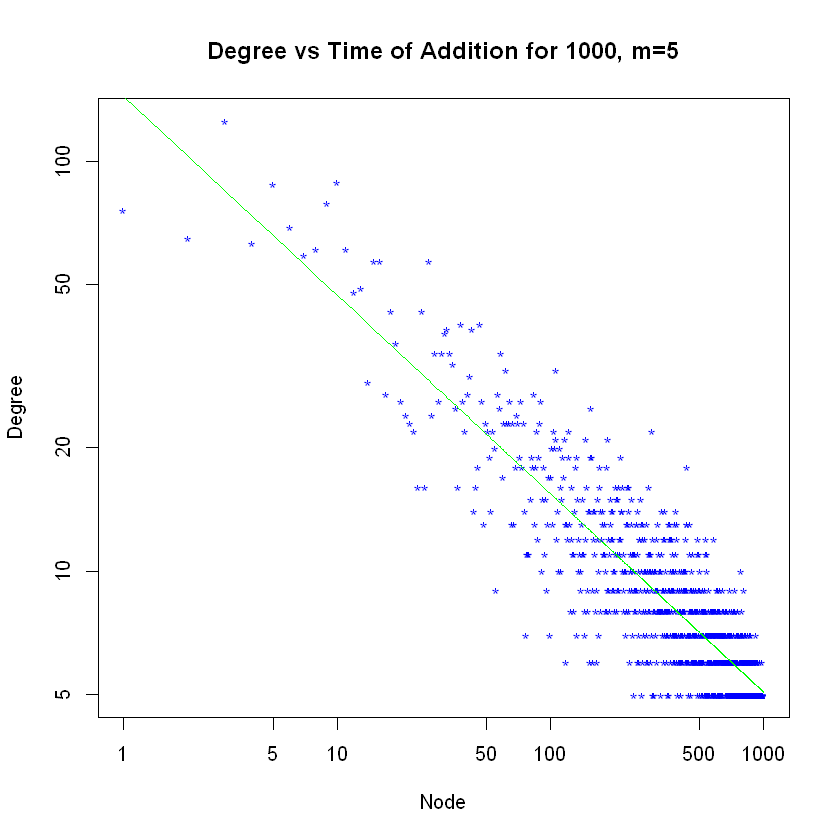

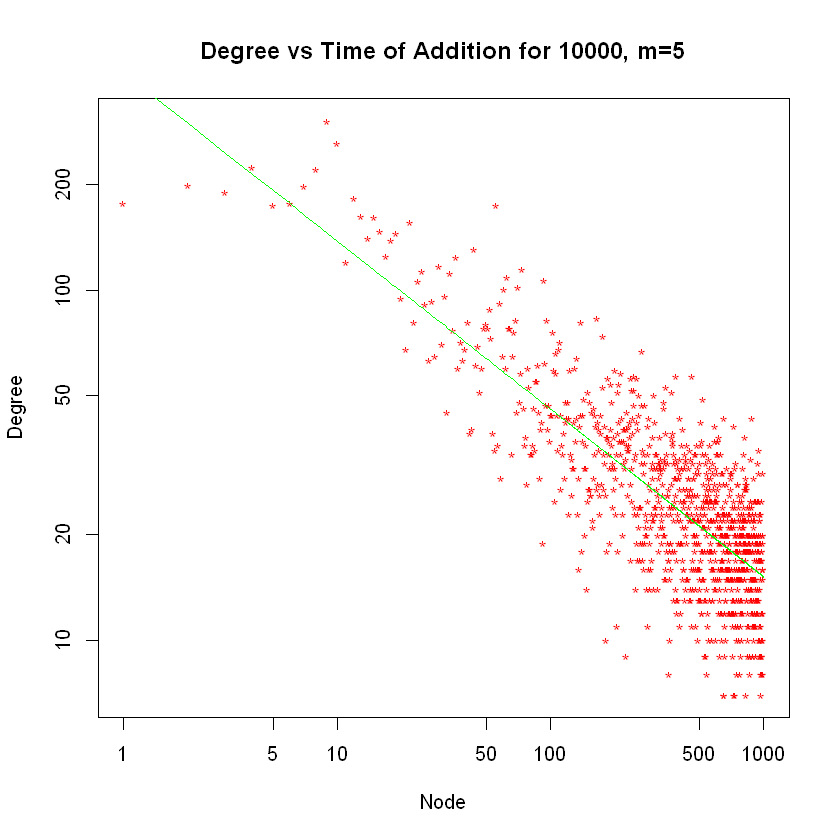

In [80]:
plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree vs Time of Addition for 1000, m=5", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

plot(1:1000, all_degrees2, type = "p", col="red", main="Degree vs Time of Addition for 10000, m=5", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

In [105]:
# Question 2(h)
g1 = sample_pa(n=1000, m=1, directed=FALSE)
deg = degree(g1, 1:1000)
g2 = sample_degseq(deg)

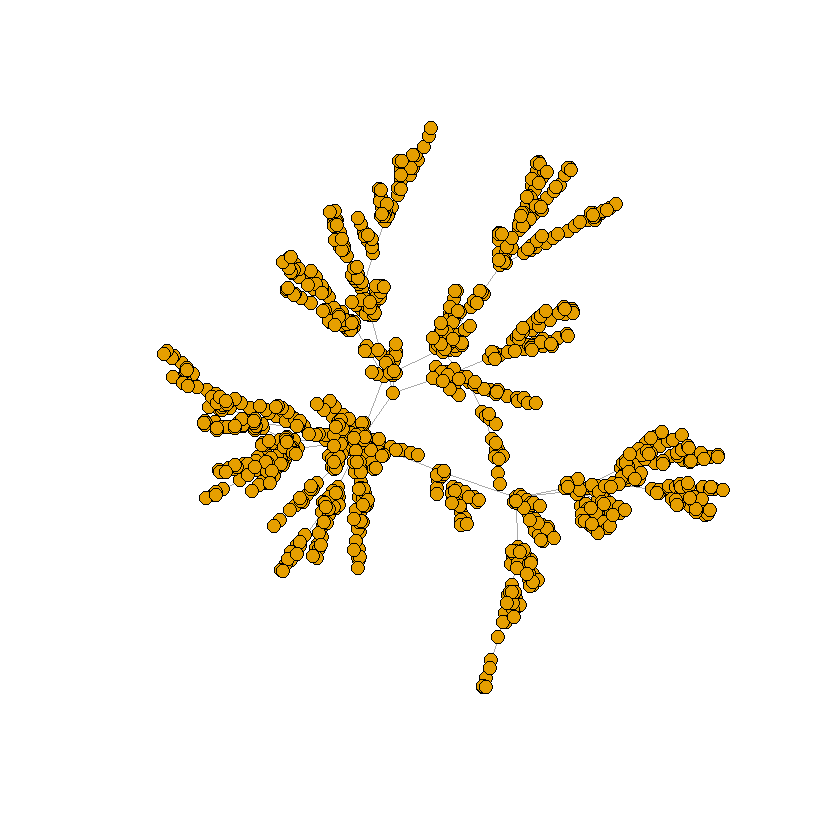

In [106]:
layout <-layout.fruchterman.reingold(g1)
plot(g1,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

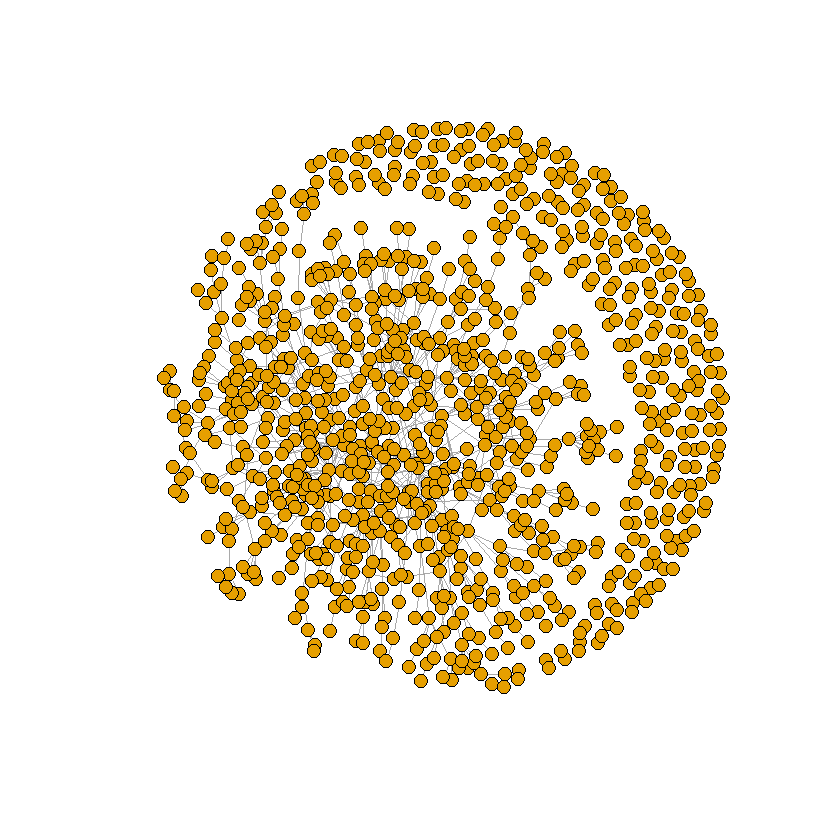

In [107]:
layout <-layout.fruchterman.reingold(g2)
plot(g2,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.9310241

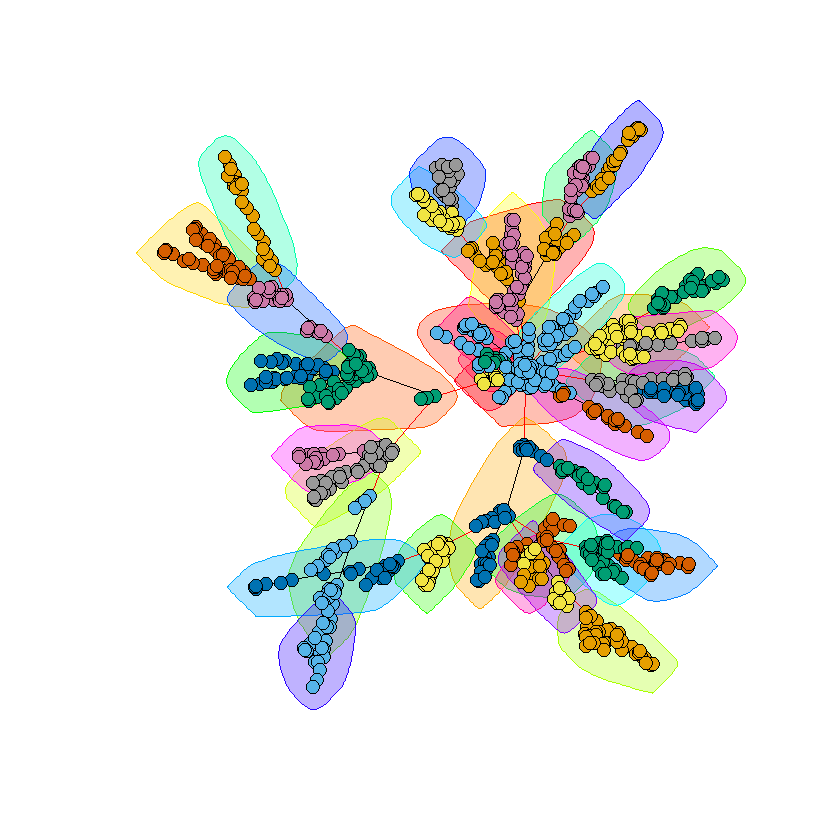

In [108]:
r1 = cluster_fast_greedy(g1, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g1, r1_mem)

layout <-layout.fruchterman.reingold(g1)
plot(r1, g1,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.7444677

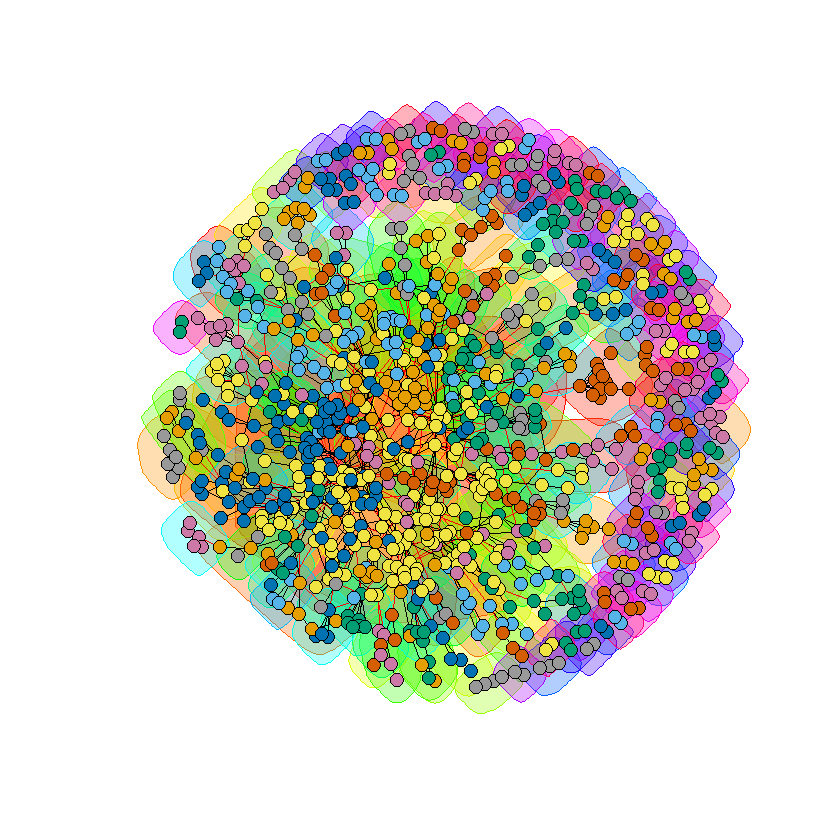

In [109]:
r2 = walktrap.community(g2) 
r2_mem = membership(r2)
modularity(g2, r2_mem)

layout <-layout.fruchterman.reingold(g2)
plot(r2, g2,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)